# S12 T01 Pipelines, grid search i text mining

In [21]:
# importing required libraries

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, hamming_loss, classification_report,  zero_one_loss, log_loss, matthews_corrcoef, roc_auc_score, confusion_matrix, roc_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Level 1

## Exercise 1

Choose a dataset to pipeline and gridsearch using the Random Forest algorithm.

In [22]:
# Wine dataset

df = pd.read_csv('wine_quality.txt',sep=';')

In [23]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There are not Nan.

In [25]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

The dependant variable is unbalanced.

Text(0.5, 1.0, 'Quality of wines')

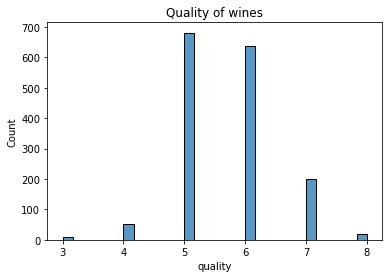

In [26]:
# Histogram of dependent variable

sns.histplot(data=df, x="quality")
plt.title("Quality of wines")

In [27]:
# Binarising dataset to help the classification model: from 2 to 6.5, bad wine, and from 6.5 to 8, good.

bins = (2, 6.5, 8)       
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names) 
df['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

Text(0.5, 1.0, 'Quality of wines')

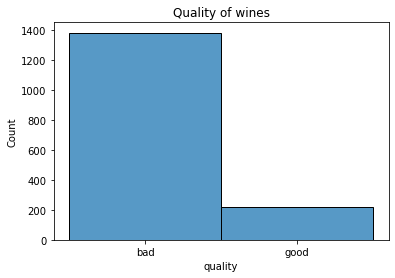

In [28]:
# Histogram after transformation

sns.histplot(data=df, x="quality")
plt.title("Quality of wines")

In [29]:
# Encoding quality: bad, 0, good, 1.

label_quality = LabelEncoder()
df['quality'] = label_quality.fit_transform(df['quality'])

In [30]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [31]:
# Dividing dataset between independent and dependent variable or label

X=df.drop(['quality'],axis=1)
y=df['quality']

In [32]:
# Dividing the dataset in train and test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=30, stratify=y)

In [33]:
# Key parameters of Random Forest Classifier

RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [34]:
# Setting the model

rand=RandomForestClassifier()

In [35]:
# Only choose two parameters to reduce computing time

param_grid = {
    'n_estimators': [100, 300, 500, 800, 1200],
    'max_depth': [5, 8, 15, 25, 30]
}


In [36]:
# Setting Grid Search Cross Validation

grid = GridSearchCV(rand, param_grid=param_grid, cv=5, verbose = 1, n_jobs = -1)

In [37]:
# Fitting the model

grid_result=grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [38]:
# Summarising results

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.914786 using {'max_depth': 15, 'n_estimators': 500}


In [39]:
# Defining the Pipeline: Standard Scaler + Random Forest Classifier

model_pipeline = Pipeline(steps=[('scaler', StandardScaler()), 
                                ('random_forest', RandomForestClassifier(verbose = 1, n_jobs = -1,max_depth= 30, n_estimators=800 ))])


# Fitting the pipeline with the training data

model_pipeline.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    0.9s finished


Pipeline(steps=[('scaler', StandardScaler()),
                ('random_forest',
                 RandomForestClassifier(max_depth=30, n_estimators=800,
                                        n_jobs=-1, verbose=1))])

In [40]:
# Predicting target values on the training data

model_pipeline.predict(X_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    0.1s finished


array([1, 0, 1, ..., 0, 0, 0])

In [41]:
# Predicting results

y_pred_rand = model_pipeline.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    0.0s finished


In [42]:
# Testing results

print ("Tests for Random Forest Classifier:\n")
       
print ("Accuracy", accuracy_score(y_test, y_pred_rand))
print ("Precision score", precision_score(y_test, y_pred_rand))
print ("Recall score",recall_score(y_test, y_pred_rand))
print ("F1 score",f1_score(y_test,y_pred_rand))
print ("AUC&ROC",roc_auc_score(y_test, y_pred_rand))

Tests for Random Forest Classifier:

Accuracy 0.88125
Precision score 0.5862068965517241
Recall score 0.3953488372093023
F1 score 0.4722222222222222
AUC&ROC 0.6760137687851566


The accuracy of the model is good, but there is probably room for improvement, according the rest of the tests, though there are other criteria beyond chemical properties, like flavour, color and others that are key to quality evaluation that are not represented in the dataset.

## Exercise 2

Choose a text in English and calculate the frequency of the words.

In [43]:
import nltk
from nltk.text import Text
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jmane\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jmane\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jmane\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jmane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
# Opening file The Guardian, Monday, 2 Dec 2021:"Germany: mandatory Covid jabs a step closer as unvaccinated face lockdown", pasted to a txt file
# Source: https://www.theguardian.com/world/2021/dec/02/germany-could-make-covid-vaccination-mandatory-says-merkel

filename = 'The_Guardian.txt'
file = open(filename, 'rt')
text = file.read()
file.close()


#### Cleaning the text

In [45]:

# Splitting into words

from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)

# Converting to lower case

tokens = [w.lower() for w in tokens]

# Removing punctuation from each word

import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]

# Removing remaining tokens that are not alphabetic

words = [word for word in stripped if word.isalpha()]
print(words[:100])

['the', 'guardian', 'thu', 'dec', 'gmt', 'germany', 'could', 'make', 'covid', 'vaccination', 'mandatory', 'says', 'merkel', 'outgoing', 'chancellor', 'also', 'announces', 'lockdown', 'measures', 'for', 'unvaccinated', 'and', 'says', 'act', 'of', 'national', 'solidarity', 'required', 'vaccination', 'could', 'become', 'mandatory', 'in', 'germany', 'from', 'february', 'angela', 'merkel', 'has', 'said', 'as', 'she', 'announced', 'what', 'her', 'successor', 'as', 'chancellor', 'olaf', 'scholz', 'described', 'as', 'a', 'lockdown', 'of', 'the', 'unvaccinated', 'as', 'more', 'eu', 'countries', 'confirmed', 'cases', 'of', 'the', 'omicron', 'variant', 'which', 'the', 'bloc', 's', 'health', 'agency', 'said', 'could', 'make', 'up', 'more', 'than', 'half', 'of', 'all', 'infections', 'on', 'the', 'continent', 'within', 'months', 'merkel', 'described', 'the', 'situation', 'as', 'very', 'serious', 'meeting', 'with', 'scholz', 'and', 'germany']


In [46]:
# Frequency of words

fdist = FreqDist(words)
print(fdist)

<FreqDist with 247 samples and 453 outcomes>


In [47]:
# Most common words

fdist.most_common(10)

[('the', 24),
 ('and', 11),
 ('of', 11),
 ('to', 11),
 ('in', 10),
 ('said', 8),
 ('merkel', 7),
 ('as', 7),
 ('on', 7),
 ('germany', 6)]

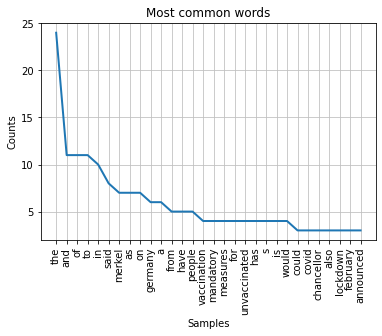

In [48]:
# Plotting most common words

fdist.plot(30,cumulative=False, title="Most common words")
plt.show()

# Level 2

### Exercise 1

Remove the stopwords and stemme from your dataset.

In [49]:
# Filtering out stop words

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[:100])

['guardian', 'thu', 'dec', 'gmt', 'germany', 'could', 'make', 'covid', 'vaccination', 'mandatory', 'says', 'merkel', 'outgoing', 'chancellor', 'also', 'announces', 'lockdown', 'measures', 'unvaccinated', 'says', 'act', 'national', 'solidarity', 'required', 'vaccination', 'could', 'become', 'mandatory', 'germany', 'february', 'angela', 'merkel', 'said', 'announced', 'successor', 'chancellor', 'olaf', 'scholz', 'described', 'lockdown', 'unvaccinated', 'eu', 'countries', 'confirmed', 'cases', 'omicron', 'variant', 'bloc', 'health', 'agency', 'said', 'could', 'make', 'half', 'infections', 'continent', 'within', 'months', 'merkel', 'described', 'situation', 'serious', 'meeting', 'scholz', 'germany', 'state', 'leaders', 'emergency', 'talks', 'thursday', 'tougher', 'measures', 'stem', 'rocketing', 'covid', 'cases', 'outgoing', 'chancellor', 'said', 'act', 'national', 'solidarity', 'required', 'understood', 'situation', 'serious', 'want', 'take', 'measures', 'addition', 'already', 'taken', 'sa

In [50]:
# Stemming of words

from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stemmed = [porter.stem(words) for words in words]
print(stemmed[:100])

['guardian', 'thu', 'dec', 'gmt', 'germani', 'could', 'make', 'covid', 'vaccin', 'mandatori', 'say', 'merkel', 'outgo', 'chancellor', 'also', 'announc', 'lockdown', 'measur', 'unvaccin', 'say', 'act', 'nation', 'solidar', 'requir', 'vaccin', 'could', 'becom', 'mandatori', 'germani', 'februari', 'angela', 'merkel', 'said', 'announc', 'successor', 'chancellor', 'olaf', 'scholz', 'describ', 'lockdown', 'unvaccin', 'eu', 'countri', 'confirm', 'case', 'omicron', 'variant', 'bloc', 'health', 'agenc', 'said', 'could', 'make', 'half', 'infect', 'contin', 'within', 'month', 'merkel', 'describ', 'situat', 'seriou', 'meet', 'scholz', 'germani', 'state', 'leader', 'emerg', 'talk', 'thursday', 'tougher', 'measur', 'stem', 'rocket', 'covid', 'case', 'outgo', 'chancellor', 'said', 'act', 'nation', 'solidar', 'requir', 'understood', 'situat', 'seriou', 'want', 'take', 'measur', 'addit', 'alreadi', 'taken', 'said', 'fourth', 'wave', 'must', 'broken', 'yet', 'achiev', 'daili']


In [51]:
stemmed

['guardian',
 'thu',
 'dec',
 'gmt',
 'germani',
 'could',
 'make',
 'covid',
 'vaccin',
 'mandatori',
 'say',
 'merkel',
 'outgo',
 'chancellor',
 'also',
 'announc',
 'lockdown',
 'measur',
 'unvaccin',
 'say',
 'act',
 'nation',
 'solidar',
 'requir',
 'vaccin',
 'could',
 'becom',
 'mandatori',
 'germani',
 'februari',
 'angela',
 'merkel',
 'said',
 'announc',
 'successor',
 'chancellor',
 'olaf',
 'scholz',
 'describ',
 'lockdown',
 'unvaccin',
 'eu',
 'countri',
 'confirm',
 'case',
 'omicron',
 'variant',
 'bloc',
 'health',
 'agenc',
 'said',
 'could',
 'make',
 'half',
 'infect',
 'contin',
 'within',
 'month',
 'merkel',
 'describ',
 'situat',
 'seriou',
 'meet',
 'scholz',
 'germani',
 'state',
 'leader',
 'emerg',
 'talk',
 'thursday',
 'tougher',
 'measur',
 'stem',
 'rocket',
 'covid',
 'case',
 'outgo',
 'chancellor',
 'said',
 'act',
 'nation',
 'solidar',
 'requir',
 'understood',
 'situat',
 'seriou',
 'want',
 'take',
 'measur',
 'addit',
 'alreadi',
 'taken',
 'sai

In [52]:
# Frequency of words after filtering stopwords and stemming

fdist = FreqDist(words)
print(fdist)

<FreqDist with 192 samples and 271 outcomes>


In [53]:
# Most common words after filtering stopwords and stemming

fdist.most_common(10)

[('said', 8),
 ('merkel', 7),
 ('germany', 6),
 ('people', 5),
 ('vaccination', 4),
 ('mandatory', 4),
 ('measures', 4),
 ('unvaccinated', 4),
 ('would', 4),
 ('could', 3)]

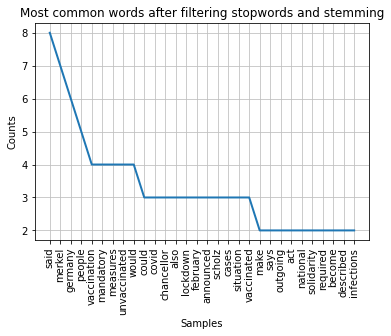

In [54]:
# Plotting most common words after filtering stopwords and stemming

fdist.plot(30,cumulative=False, title="Most common words after filtering stopwords and stemming")
plt.show()

# Level 3

## Exercise 1

Perform sentiment analysis on your dataset

Sentiment Analysis can help us decipher the mood and emotions of general public and gather insightful information regarding the context. Sentiment Analysis is a process of analyzing data and classifying it based on the need of the research.

In [55]:
# Converting list to string

list=stemmed

article=" ".join(map(str,list))

In [56]:
# Importing library TextBlob

from textblob import TextBlob

In [57]:
# Polarity of the text

book_sent = TextBlob(article)
book_sent.sentiment

Sentiment(polarity=-0.0823051948051948, subjectivity=0.27505411255411255)

#### Conclusion

The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity). Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. Subjectivity lies between [0,1]. The higher subjectivity means that the text contains personal opinion rather than factual information

Our text (The Guardian, Monday, 2 Dec 2021:"Germany: mandatory Covid jabs a step closer as unvaccinated face lockdown") is quite neutral because polarity is close to 0 and subjectivity is low, though cotains some personal opinion.